# 파이썬에서 웹페이지를 스크래핑해보기

In [1]:
# 파이썬에서 웹페이지를 scraping
# 원하는 데이터를 뽑아오기 위한 예제
import requests

In [2]:
r = requests.get('https://www.naver.com/')
print(r)

<Response [200]>



<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
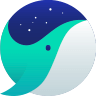
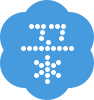

In [3]:
print(r.text)


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
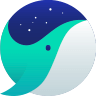
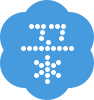

In [4]:
html = requests.get('https://www.naver.com/').text
print(html)

In [5]:
from bs4 import BeautifulSoup

In [6]:
html = """<html>
          <body>
              <div>
                  <span>
                      <a href=http://www.naver.com>naver</a>
                      <a href=https://www.google.com>google</a>
                      <a href=http://www.daum.net/>daum</a>
                  </span>
            </div>
        </body>
        </html>"""

In [7]:
soup = BeautifulSoup(html, 'lxml')

In [8]:
print(soup)

<html><body><div><span>
<a href="http://www.naver.com">naver</a>
<a href="https://www.google.com">google</a>
<a href="http://www.daum.net/">daum</a>
</span></div></body></html>


In [10]:
print(soup.prettify()) # 이쁘게 펼쳐줌

<html>
 <body>
  <div>
   <span>
    <a href="http://www.naver.com">
     naver
    </a>
    <a href="https://www.google.com">
     google
    </a>
    <a href="http://www.daum.net/">
     daum
    </a>
   </span>
  </div>
 </body>
</html>


In [11]:
print(soup.find('a')) # 맨 처음 찾은 'a' 값만 리턴

<a href="http://www.naver.com">naver</a>


In [12]:
print(soup.find('a').get_text()) # 맨 처음 찾은 'a' 값의 text를 리턴

naver


In [13]:
print(soup.find_all('a')) # 리스트형태

[<a href="http://www.naver.com">naver</a>, <a href="https://www.google.com">google</a>, <a href="http://www.daum.net/">daum</a>]


In [16]:
sites = soup.find_all('a') # 리스트형태이기 때문에 바로 get_text() 못씀
for site in sites: 
    print(site.get_text())

naver
google
daum


In [19]:
html02 = """
<html>
<head>
<title>작품과 작가 모음</title>
</head>
<body>
    <h1>책 정보</h1>
        <p id="book_title">토지</p>
        <p id="author">박경리</p>
        <p id="book_title">태백산맥</p>
        <p id="author">조정래</p>
        <p id="book_title">감옥으로부터의 사색</p>
        <p id="author">신영복</p>
</body>
</html>
"""

In [20]:
soup02 = BeautifulSoup(html02, 'lxml')

In [21]:
print(soup02.title)

<title>작품과 작가 모음</title>


In [22]:
print(soup02.body)

<body>
<h1>책 정보</h1>
<p id="book_title">토지</p>
<p id="author">박경리</p>
<p id="book_title">태백산맥</p>
<p id="author">조정래</p>
<p id="book_title">감옥으로부터의 사색</p>
<p id="author">신영복</p>
</body>


In [23]:
print(soup02.body.h1)

<h1>책 정보</h1>


In [28]:
print(soup02.find('p', {'id': 'book_title'})) # p 태그중 id값을 가져오고싶을때

<p id="book_title">토지</p>


In [29]:
print(soup02.find_all('p', {'id': 'book_title'}))

[<p id="book_title">토지</p>, <p id="book_title">태백산맥</p>, <p id="book_title">감옥으로부터의 사색</p>]


In [32]:
book_titles = soup02.find_all('p', {"id":"book_title"})
authors = soup02.find_all('p', {"id":"author"})

for book_title, author in zip(book_titles, authors):
    print(book_title.get_text() + '/' + author.get_text())

토지/박경리
태백산맥/조정래
감옥으로부터의 사색/신영복


In [33]:
## css selector
print(soup02.select('body h1')) 

[<h1>책 정보</h1>]


In [34]:
print(soup02.select('body p'))

[<p id="book_title">토지</p>, <p id="author">박경리</p>, <p id="book_title">태백산맥</p>, <p id="author">조정래</p>, <p id="book_title">감옥으로부터의 사색</p>, <p id="author">신영복</p>]


In [35]:
print(soup02.select('p#book_title'))

[<p id="book_title">토지</p>, <p id="book_title">태백산맥</p>, <p id="book_title">감옥으로부터의 사색</p>]


In [36]:
html03 = """
    <!doctype html>

    <html>
    <head>
    <meta charset="utf-8">
    <title>사이트 모음</title>
    </head>
    <body>
        <p id="title">
            <b>자주 가는 사이트 모음</b>
        </p>
        
        <p id="contents">이곳은 자주 가는 사이트를 모아둔 곳입니다.</p>
            <a href="http://www.naver.com" class="portal" id="naver">네이버</a> <br>
            <a href="https://www.google.com" class="search" id="google">구글</a> <br>
            <a href="http://www.daum.net" class="portal" id="daum">다음</a> <br>
            <a href="http://www.nl.go.kr" class="government" id="nl">국립중앙도서관</a>
    </body>
    </html>
"""

In [39]:
soup03 = BeautifulSoup(html03, 'lxml')

print(soup03.select('a.portal'))

[<a class="portal" href="http://www.naver.com" id="naver">네이버</a>, <a class="portal" href="http://www.daum.net" id="daum">다음</a>]
